In [0]:
#2(a)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Train Features :")
print(X_train[0:2])
print(" ")
print("Train Labels :")
print(y_train[0:2])

print(" ")
print("Test Features :")
print(X_test[0:2])
print(" ")
print("Test Labels :")
print(y_test[0:2])

Train Features :
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70

In [0]:
#2(b)
bird_data_train=[]
indexes = [i for i,x in enumerate(y_train) if x == 2]
for y in indexes:
  bird_data_train.append(X_train[y])
#print(bird_data_train)
bird_data_test=[]
indexes_test = [i for i,x in enumerate(y_test) if x == 2]
for y in indexes_test:
  bird_data_test.append(X_test[y])


train_data=np.concatenate(((np.array(bird_data_train).reshape(-1,3)),(np.array(bird_data_test).reshape(-1,3))),axis=0)

print("Bird Data Train:")
print(bird_data_train[0:2])


print("Bird Data Test:")
print(bird_data_test[0:2])

Bird Data Train:
[array([[[164, 206,  84],
        [105, 140,  61],
        [118, 148, 101],
        ...,
        [109, 147,  73],
        [108, 147,  69],
        [ 91, 129,  57]],

       [[167, 213,  84],
        [116, 160,  49],
        [ 72, 109,  43],
        ...,
        [105, 142,  79],
        [105, 142,  72],
        [ 89, 127,  57]],

       [[140, 191,  65],
        [142, 193,  66],
        [119, 163,  79],
        ...,
        [104, 139,  84],
        [ 84, 120,  58],
        [ 78, 115,  49]],

       ...,

       [[139, 148,  81],
        [142, 155,  74],
        [135, 156,  72],
        ...,
        [ 89, 134,  28],
        [ 97, 148,  24],
        [126, 176,  49]],

       [[163, 157,  85],
        [153, 164,  82],
        [146, 164,  90],
        ...,
        [ 85, 130,  19],
        [ 98, 148,  27],
        [127, 178,  48]],

       [[183, 153, 102],
        [176, 182, 116],
        [154, 154, 100],
        ...,
        [ 94, 134,  29],
        [ 91, 133,  26],
      

In [0]:
#2(c)
print("Shape of train data for clustering :"+str(train_data.shape))

Shape of train data for clustering :(6144000, 3)


In [0]:
#2(d)
kmeans = KMeans(n_clusters=4, random_state=0).fit(train_data)
print("Classess assigned to the data:")
print(kmeans.labels_)

Classess assigned to the data:
[2 0 0 ... 2 2 2]


In [0]:
pred_val_train=kmeans.predict(np.array(bird_data_train).reshape(-1,3))
pred_val_train=pred_val_train.reshape(5000,32,32,1)
pred_val_train=to_categorical(pred_val_train)
pred_val_test=kmeans.predict(np.array(bird_data_test).reshape(-1,3))

pred_val_test=pred_val_test.reshape(1000,32,32,1)
pred_val_test=to_categorical(pred_val_test)
#pred_val_test.shape

(1000, 32, 32, 4)

In [0]:
#2(e)
bird_data_train_scaled=[]
for i in bird_data_train:
  bird_data_train_scaled.append(cv2.cvtColor(i,cv2.COLOR_BGR2GRAY))
  
bird_data_train_scaled=np.array(bird_data_train_scaled)

bird_data_test_scaled=[]
for i in bird_data_test:
  bird_data_test_scaled.append(cv2.cvtColor(i,cv2.COLOR_BGR2GRAY))
  
bird_data_test_scaled=np.array(bird_data_test_scaled)

grayscale_images=copy.deepcopy(bird_data_test_scaled)

bird_data_train_scaled=bird_data_train_scaled.reshape(5000,32,32,1)
bird_data_test_scaled=bird_data_test_scaled.reshape(1000,32,32,1)

print("Shape of Grayscale Data :")
print(bird_data_train_scaled.shape)

Shape of Grayscale Data :
(5000, 32, 32, 1)


In [0]:
#2(f)
model = Sequential()
model.add(Conv2D(10, kernel_size=5, strides=1,activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, kernel_size=5,strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(4096, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

pred_val_train=np.reshape(pred_val_train,(len(pred_val_train),4096))
#print(pred_val_test.shape)
pred_val_test=np.reshape(pred_val_test,(len(pred_val_test),4096))
#print(pred_val_train.shape)
metrics=model.fit(bird_data_train_scaled, pred_val_train, validation_data=(bird_data_test_scaled, pred_val_test), epochs=50)



W0721 17:53:14.131942 140643110934400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 17:53:14.176233 140643110934400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 17:53:14.185024 140643110934400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 17:53:14.229587 140643110934400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0721 17:53:14.284625 140643110934400 deprecation_wrapp

(1000, 32, 32, 4)
(5000, 4096)
Train on 5000 samples, validate on 1000 samples
Epoch 1/50
5000/5000 [==============================] - 26s 5ms/step - loss: 8530.9051 - acc: 4.0000e-04 - val_loss: 8350.2183 - val_acc: 0.0000e+00
Epoch 2/50
5000/5000 [==============================] - 25s 5ms/step - loss: 8267.9695 - acc: 8.0000e-04 - val_loss: 8235.6967 - val_acc: 0.0000e+00
Epoch 3/50
5000/5000 [==============================] - 24s 5ms/step - loss: 8182.6738 - acc: 0.0000e+00 - val_loss: 8194.7986 - val_acc: 0.0000e+00
Epoch 4/50
5000/5000 [==============================] - 23s 5ms/step - loss: 8121.9151 - acc: 2.0000e-04 - val_loss: 8181.5196 - val_acc: 0.0000e+00
Epoch 5/50
5000/5000 [==============================] - 24s 5ms/step - loss: 8077.2043 - acc: 2.0000e-04 - val_loss: 8174.0315 - val_acc: 0.0000e+00
Epoch 6/50
5000/5000 [==============================] - 24s 5ms/step - loss: 8045.5456 - acc: 2.0000e-04 - val_loss: 8184.0993 - val_acc: 0.0000e+00
Epoch 7/50
5000/5000 [=====

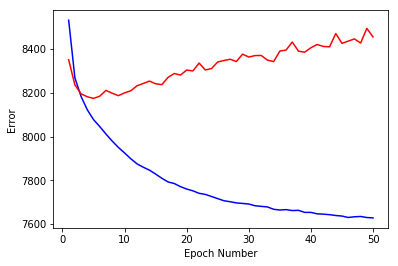

In [0]:
train_errors=metrics.history['loss']
test_errors=metrics.history['val_loss']
x_val=np.arange(1,51,1)
plt.plot(x_val,train_errors,c='blue',label='Train Error')
plt.plot(x_val,test_errors,c='red',label='Test Error')
plt.ylabel("Error")
plt.xlabel("Epoch Number")
plt.legend()
plt.show()


In [0]:
pred=model.predict(bird_data_test_scaled[0:10])


Original Images


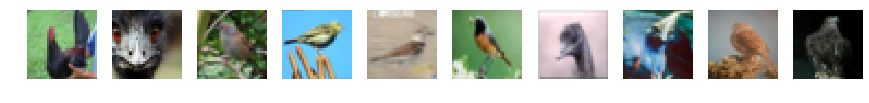

Gray Scale Images


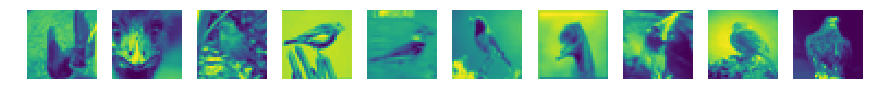

Output Colored Images


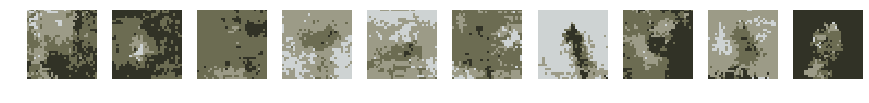

In [0]:
print("Original Images")
fig=plt.figure(figsize=(15, 15))
for i in range(1,11):
  temp=np.array(bird_data_test)[i-1]
  fig.add_subplot(10, 10, i)
  plt.imshow(temp)
  plt.axis('off')
plt.show()

print("Gray Scale Images")
fig=plt.figure(figsize=(15, 15))
for i in range(1,11):
  temp=grayscale_images[i-1]
  fig.add_subplot(10, 10, i)
  plt.imshow(temp)
  plt.axis('off')
plt.show()

print("Output Colored Images")
fig=plt.figure(figsize=(15, 15))
for i in range(1,len(pred)+1):
  temp=pred[i-1].reshape(32,32,4).reshape(-1,4)
  ind1=[]
  for k in list(temp):
    k=list(k)
    ind1.append(k.index(max(k)))
  fin_test=[]
  for k in ind1:
    fin_test.append(kmeans.cluster_centers_[k])
  te=(np.uint8(np.array(fin_test)).reshape(32,32,3))
  fig.add_subplot(10, 10, i)
  plt.imshow(te)
  plt.axis('off')
plt.show()